# Used Cars Analysis
### Sunpreet S. Chahal

##### Within this notebook I will be conduction analysis on a dataframe that contains data about 38,531 used cars.
The data is seperated into various catergories, such as; manufacterer name, model name. colour, year produced, body type, fuel type, mileage, price and more.

There are few aspects of this dataframe which I eant to look into more, these being; 

- Most popular manufacturers/brandss, visualise what are the (x) most popular brands and to find if there's a particular brand that's an outlier and holds alot of the stock under their brand.
- Diversity of body types available, what are the most popular and least popular body types that are available.
- Diversity of colours available, what's the most popular and least popular colour options of the available stock. 
- Visualise the various production years of the cars, whether there's an equal distribution or not. 
- How many cars have manual transmission vs automatic transmission.

There are values within the dataframe that contain terms that aren't native to the UK, and I will therefore manipulate these so that the terms used are familiar.

#### Set-up

In [ ]:
something = 'some_str'

In [1]:
## Import libraries
import pandas as pd
import numpy as ny
import matplotlib.pyplot as mpy
import matplotlib as mtp
import seaborn as sns

In [2]:
## Import Dataframe 
#Duplicate backslashes (\) if cannot load df.
carsdb = pd.read_csv("D:\\PROJECTS\\Used Cars ✔\\Used Car Dataset ORIGINAL.csv",encoding='ISO-8859-1',low_memory=False)

#Get info of the dataframe
carsdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   manufacturer_name       38531 non-null  object 
 1   model_name              38531 non-null  object 
 2   transmission            38531 non-null  object 
 3   colour                  38531 non-null  object 
 4   mileage                 38531 non-null  int64  
 5   year_produced           38531 non-null  int64  
 6   engine_fuel             38531 non-null  object 
 7   engine_has_gas          38531 non-null  bool   
 8   engine_type             38531 non-null  object 
 9   engine_capacity         38521 non-null  float64
 10  body_type               38531 non-null  object 
 11  has_warranty            38531 non-null  bool   
 12  state                   38531 non-null  object 
 13  drivetrain              38531 non-null  object 
 14  price_usd               38531 non-null

In [3]:
carsdb.columns

Index(['manufacturer_name', 'model_name', 'transmission', 'colour', 'mileage',
       'year_produced', 'engine_fuel', 'engine_has_gas', 'engine_type',
       'engine_capacity', 'body_type', 'has_warranty', 'state', 'drivetrain',
       'price_usd', 'is_exchangeable', 'number_of_photos', 'up_counter',
       'duration_listed (Days)'],
      dtype='object')

### Data Cleaning & Manipulation

In [4]:
##Check for any null values 
carsdb.isnull().sum()

manufacturer_name          0
model_name                 0
transmission               0
colour                     0
mileage                    0
year_produced              0
engine_fuel                0
engine_has_gas             0
engine_type                0
engine_capacity           10
body_type                  0
has_warranty               0
state                      0
drivetrain                 0
price_usd                  0
is_exchangeable            0
number_of_photos           0
up_counter                 0
duration_listed (Days)     0
dtype: int64

In [5]:
##Replace NULL values
carsdb.fillna(0)

,manufacturer_name,model_name,transmission,colour,mileage,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,number_of_photos,up_counter,duration_listed (Days)
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,9,13,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,12,54,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,4,72,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,9,42,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,14,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,2750.00,True,5,85,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,hatchback,False,owned,front,4800.00,True,4,20,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,4300.00,False,3,63,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,minivan,False,owned,front,4000.00,True,7,156,490


In [6]:
##Convert US terms into UK terms
#Save the replaced terms in the given function
carsdb = carsdb.replace('mechanical', 'manual')
carsdb = carsdb.replace('gasoline', 'petrol')
carsdb = carsdb.replace('sedan', 'saloon')
carsdb = carsdb.replace('universal', 'suv')
carsdb = carsdb.replace('minivan', 'van')

In [7]:
#Present Changes
carsdb

,manufacturer_name,model_name,transmission,colour,mileage,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,number_of_photos,up_counter,duration_listed (Days)
0,Subaru,Outback,automatic,silver,190000,2010,petrol,False,petrol,2.5,suv,False,owned,all,10900.00,False,9,13,16
1,Subaru,Outback,automatic,blue,290000,2002,petrol,False,petrol,3.0,suv,False,owned,all,5000.00,True,12,54,83
2,Subaru,Forester,automatic,red,402000,2001,petrol,False,petrol,2.5,suv,False,owned,all,2800.00,True,4,72,151
3,Subaru,Impreza,manual,blue,10000,1999,petrol,False,petrol,3.0,saloon,False,owned,all,9999.00,True,9,42,86
4,Subaru,Legacy,automatic,black,280000,2001,petrol,False,petrol,2.5,suv,False,owned,all,2134.11,True,14,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,petrol,False,petrol,3.5,saloon,False,owned,front,2750.00,True,5,85,301
38527,Chrysler,PT Cruiser,manual,blue,321000,2004,diesel,False,diesel,2.2,hatchback,False,owned,front,4800.00,True,4,20,317
38528,Chrysler,300,automatic,blue,777957,2000,petrol,False,petrol,3.5,saloon,False,owned,front,4300.00,False,3,63,369
38529,Chrysler,PT Cruiser,manual,black,20000,2001,petrol,False,petrol,2.0,van,False,owned,front,4000.00,True,7,156,490


In [8]:
##Present all unique values 
carsdb.body_type.unique()

array(['suv', 'saloon', 'hatchback', 'liftback', 'van', 'minibus',
       'pickup', 'coupe', 'cabriolet', 'limousine'], dtype=object)

In [9]:
carsdb.describe()

,mileage,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed (Days)
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


### Data Visualisation

##### Manufacturers of the cars
Analyse the different manufacturers of the cars, then visualise to see the brand diversity within this dataset

In [10]:
##Count the amount of vehicles with Manual/Automatic Transmissions

#Count the amount of vehicles per brand
carsdb['Count'] = 1
macars = carsdb.groupby(['manufacturer_name']).count()['Count']

In [11]:
##Present a sample of the code above
macars.head()

manufacturer_name
Acura           66
Alfa Romeo     207
Audi          2468
BMW           2610
Buick           47
Name: Count, dtype: int64

In [12]:
##I want work with the top 10~ brands since they take up a more significant amount of the stock
macars = macars.sort_values()
macars.tail(10)

manufacturer_name
Nissan           1361
Citroen          1562
Peugeot          1909
Mercedes-Benz    2237
Audi             2468
Renault          2493
Ford             2566
BMW              2610
Opel             2759
Volkswagen       4243
Name: Count, dtype: int64

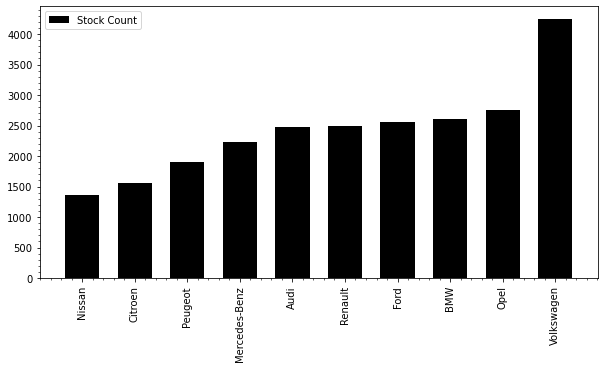

In [69]:
##Create a bar chart for various brands of the cars
#Supply Values
labels = ['Nissan','Citroen','Peugeot','Mercedes-Benz','Audi','Renault','Ford','BMW','Opel','Volkswagen'  ]
values = [1361,1562,1909,2237,2468,2493,2566,2610,2759,4243]
mpy.figure(figsize= (10,5))

##Plot Data
col_cman = mpy.bar(labels, values, width = 0.65, label = 'Stock Count', color=['black'])
mpy.yticks()
mpy.xticks(labels, rotation= 'vertical')
mpy.minorticks_on()

##Present Data
mpy.legend()
mpy.show(col_cman)


Known for their great build quality, reliability and good price:performance, it's no suprise to find that most of the most popular brands within the used car selection are German brands; BMW, Audi, Mercedes-Benz, Volkswagen and Opel.

##### Manufacturers & Price Correlation
Analyse the different manufacturers of the cars and the average prices per manufacturer, I'll be able to see how each brand varies their prices for their vehicles. 

I will sum up the prices of the cars for each brand seperately.
Then create chart to showcase the total prices/brand.

In [59]:
##Sum total price of each brand's cars
#BP = Brand-Price
NissanBP = carsdb.loc[carsdb['manufacturer_name'] == 'Nissan']
NissanBP = int(NissanBP['price_usd'].sum())

ctrn = carsdb.loc[carsdb['manufacturer_name'] == 'Citroen']
ctrn = int(ctrn['price_usd'].sum())
ctrn

PeugeotBP = carsdb.loc[carsdb['manufacturer_name'] == 'Peugeot']
PeugeotBP = int(PeugeotBP['price_usd'].sum())

MercBP = carsdb.loc[carsdb['manufacturer_name'] == 'Mercedes-Benz']
MercBP = int(MercBP['price_usd'].sum())

AudiBP = carsdb.loc[carsdb['manufacturer_name'] == 'Audi']
AudiBP = int(AudiBP['price_usd'].sum())

RenaultBP = carsdb.loc[carsdb['manufacturer_name'] == 'Renault']
RenaultBP = int(RenaultBP['price_usd'].sum())

FordBP = carsdb.loc[carsdb['manufacturer_name'] == 'Ford']
FordBP = int(FordBP['price_usd'].sum())

BMW_BP = carsdb.loc[carsdb['manufacturer_name'] == 'BMW']
BMW_BP = int(BMW_BP['price_usd'].sum())

OpelBP = carsdb.loc[carsdb['manufacturer_name'] == 'Opel']
OpelBP = int(OpelBP['price_usd'].sum())

VolkswagenBP = carsdb.loc[carsdb['manufacturer_name'] == 'Volkswagen']
VolkswagenBP = int(VolkswagenBP['price_usd'].sum())

NissanBP

8726070

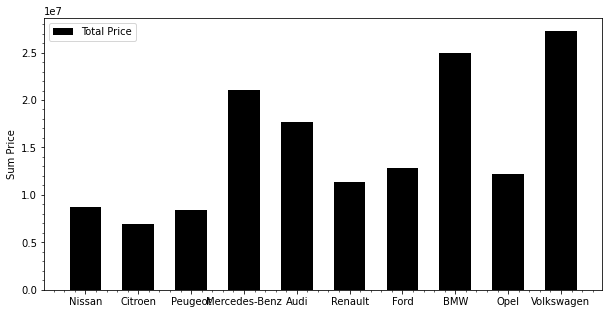

In [60]:
##Create a bar chart 
#Supply Values
labels = ['Nissan','Citroen','Peugeot','Mercedes-Benz','Audi','Renault','Ford','BMW','Opel','Volkswagen']
values = [NissanBP, CitroenBP, PeugeotBP, MercBP, AudiBP, RenaultBP, FordBP, BMW_BP, OpelBP, VolkswagenBP]
mpy.figure(figsize= (10,5))

##Plot Data
col_tprice = mpy.bar(labels, values, width = 0.6, label = 'Total Price', color=['black'])
mpy.ylabel('Sum Price')

#Each tick = 100,000
mpy.yticks()
mpy.xticks(labels, rotation= 'horizontal')
mpy.minorticks_on()

##Present Data
mpy.legend()
mpy.show(col_tprice)


The sum price comparison is more volitle, with there not being an obvious pattern. The patten between the amount of stock each brand has within this dataset is a lot more obvious with there being a steady incline, whereas here, there is a more volitle pattern, the reasons for this being; 

- Mercedes, BMW and Audi are the three outlying brands that seem to have more expensive cars for offer, relative to their stock. This is no suprise as these three German car manufacturers are well-known for their luxury cars (E/S Class, 7/8 Series, A7/A8), aswell as their sport/super cars. 


- The other brands' bars seem to remain consistent - their price/stock available. Implying the prices of the vehicles offered by these brands are low. For example; Volkswagen has the largest lead within both catergories, the total price and the total stock that is present. Though having a massive lead over the other brands, there is a 1:1 correlation between the price/stock. This is because Volkswagen's cars are quite affordable and cover many demographics - new drivers (VW POLO) & experienced drivers (VW GOLF R/GTi), where as the other three German manufacturers are quite expensive. 

##### Body type of the cars
Analyse the different body options for the cars, and to visualise each body-type. 

In [16]:
##Count the amount of vehicles with Manual/Automatic Transmissions
carsdb['Count'] = 1
carbod = carsdb.groupby(['body_type']).count()['Count']

In [17]:
carbod.sort_values()

body_type
limousine       12
cabriolet       75
pickup         129
liftback       552
coupe          652
minibus       1369
van           4416
hatchback     7644
suv          10671
saloon       13011
Name: Count, dtype: int64

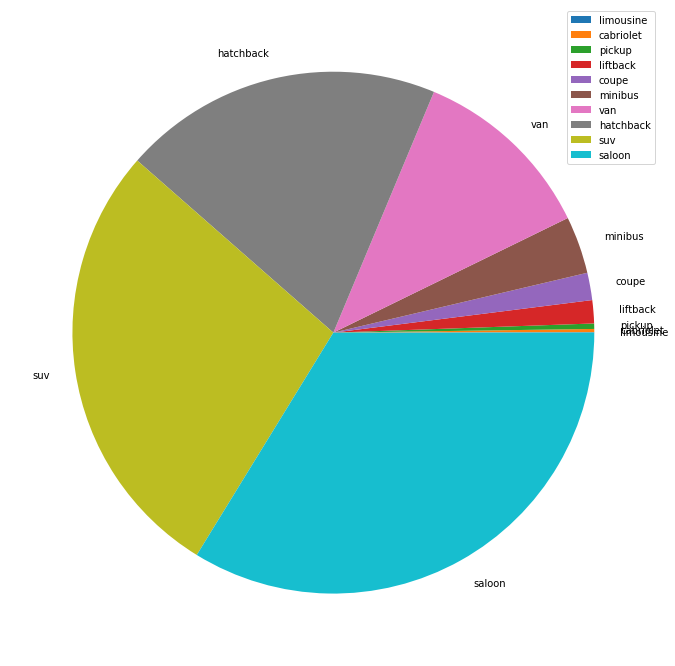

In [18]:
##Create a pie chart for the different transmissions
#Supply Values
bodcount = [12,75,129,552,652,1369,4416,7644,10671,13011]
bodlabels = ['limousine','cabriolet','pickup','liftback','coupe','minibus','van','hatchback','suv','saloon']
mpy.figure(figsize= (15,12))

##Plot pie
bod_pie = mpy.pie(bodcount, labels = bodlabels)

##Present
mpy.legend()
mpy.show(bod_pie)

The distribution of the body types reflects the roads we drive on everyday; saloons, hatchbakcs, SUVs and vans being the most common vehicles types on the roads, and limousines being very rare - compared to the other car types present. 

The distrubtion also makes alot of sense, as it also reflects the modern customers' needs; Hatchbacks (favoured by new drivers, as hatchbacks tend to be cheaper than SUVs/Saloons - on average), SUV/Saloons (favoured by families who require more space) and Vans (For work purposes)

##### Colours of the cars
Analyse the different colour options for the cars, and to visualise each body-type to see the diverity of colour options

In [19]:
##Count the different body-types of the cars 
carsdb['Count'] = 1
colcars = carsdb.groupby(['colour']).count()['Count']

In [20]:
colcars.head(5)

colour
black    7705
blue     5802
brown     886
green    2760
grey     3751
Name: Count, dtype: int64

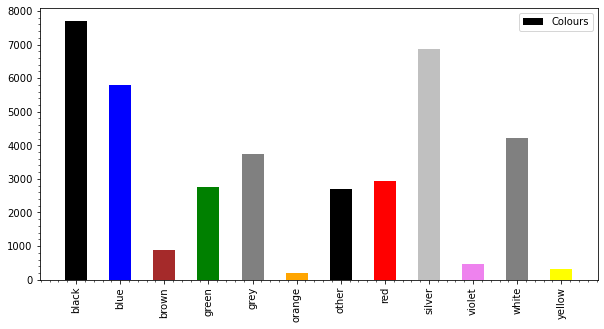

In [70]:
##Create a bar chart for various colours of the cars
#Supply Values
labels = ['black','blue','brown','green','grey','orange','other','red','silver','violet','white','yellow' ]
colour_values = [7705,5802,886,2760,3751,184,2688,2925,6852,463,4212,303]
mpy.figure(figsize= (10,5))

##Plot Data
col_bar = mpy.bar(labels, colour_values, width = 0.5, label = 'Colours', color=['black','blue','brown','green','grey','orange','black','red','silver','violet','grey','yellow'])
mpy.yticks()
mpy.xticks(labels, rotation= 'vertical')
mpy.minorticks_on()

##Present Data
mpy.legend()
mpy.show(col_bar)

## White/Other not available and have been subsituted for another colour

##### Production year of the cars 
Analyse the production years of the present cars, visualise to the diversity of the production years of the cars

In [22]:
##Create a variable for each decade, us; .between (*value1, *value*) to select a range 
#Create another variable to sum up all of the True values, then plot values within a chart
dec40s = carsdb['year_produced'].between(1940, 1949, inclusive=False).sort_values(ascending=False)
d40s = sum(dec40s)

dec50s = carsdb['year_produced'].between(1950, 1960, inclusive=False).sort_values()
d50s = sum(dec50s)

dec60s = carsdb['year_produced'].between(1960, 1970, inclusive=False).sort_values()
d60s = sum(dec50s)

dec70s = carsdb['year_produced'].between(1970, 1980, inclusive=False).sort_values()
d70s = sum(dec70s)

dec80s = carsdb['year_produced'].between(1980, 1990, inclusive=False).sort_values()
d80s = sum(dec80s)

dec90s = carsdb['year_produced'].between(1990, 2000, inclusive=False).sort_values()
d90s = sum(dec80s)

dec00s = carsdb['year_produced'].between(2000, 2010, inclusive=False).sort_values()
d00s = sum(dec00s)

dec10s = carsdb['year_produced'].between(2010, 2020, inclusive=False).sort_values()
d10s = sum(dec10s)

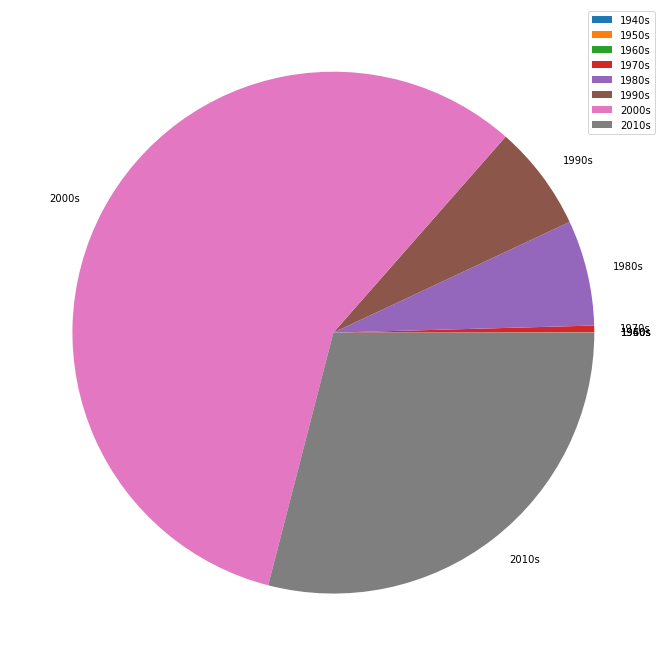

In [23]:
##Create a pie chart for the different catergoiries of production years 
#Supply Values
tcount = [d40s, d50s,d60s, d70s, d80s, d90s, d00s, d10s]
tlabels = ['1940s','1950s','1960s','1970s','1980s','1990s','2000s','2010s']
mpy.figure(figsize= (15,12))

##Plot pie
yr_pie = mpy.pie(tcount, labels = tlabels)

##Present
mpy.legend()
mpy.show(yr_pie)

##### Transmission of the cars

In [24]:
##Count the amount of vehicles with Manual/Automatic Transmissions
carsdb['Count'] = 1
tcars = carsdb.groupby(['transmission']).count()['Count']

In [25]:
tcars

transmission
automatic    12898
manual       25633
Name: Count, dtype: int64

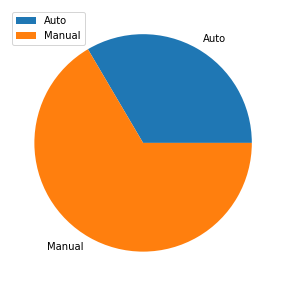

In [26]:
##Create a pie chart for the different transmissions
#Supply Values
tcount = [12898, 25633]
tlabels = ['Auto', 'Manual']
mpy.figure(figsize= (10,5))

##Plot pie
t_pie = mpy.pie(tcount, labels = tlabels)

##Present
mpy.legend()
mpy.show(t_pie)